## Import Dependencies

In [1]:
# Import for Database
from config import password
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib notebook
import seaborn as sns


## Getting data from PostgreSQL

In [2]:
# config.py will need to be created with password = <postgresql server password>
db_string = f"postgresql+psycopg2://postgres:" + password + "@127.0.0.1:5432/final_project"  # "final_project" will need to be replaced witht the server name
engine = create_engine(db_string)  
inspector = inspect(engine)
inspector.get_table_names()

['stats', 'betting']

In [3]:
connection = engine.connect
session = Session(engine)
engine.execute("SELECT * from stats")

In [4]:
col_names_list = []

#i = 0
for i in range(len(inspector.get_columns('stats'))):
    col_names_list.append(inspector.get_columns('stats')[i]['name'])
    
for i in range(len(inspector.get_columns('betting'))):
    col_names_list.append(inspector.get_columns('betting')[i]['name'])
    
print(col_names_list)

['id', 'div', 'date', 'hometeam', 'awayteam', 'fthg', 'ftag', 'ftr', 'hthg', 'htag', 'htr', 'referee', 'hs', 'ass', 'hst', 'ast', 'hf', 'af', 'hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'id', 'div', 'b365h', 'b365d', 'b365a', 'vch', 'vcd', 'vca']


In [5]:
df = pd.DataFrame(columns = col_names_list)

In [6]:
# Inner join for wines and regions
import sys
join_db = engine.execute("SELECT * from stats inner join betting on stats.id = betting.id")
for record in join_db:
    record_series = pd.Series(list(record), index = df.columns)
    
    df = df.append(record_series, ignore_index=True)
    #print(list(record))

In [7]:
df.head()

,id,div,date,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,...,hr,ar,id,div,b365h,b365d,b365a,vch,vcd,vca
0,0,E0,2007-08-11,Aston Villa,Liverpool,1,2,A,0,1,...,0,0,0,E0,4,3.25,1.9,3.5,3.2,2
1,1,E0,2007-08-11,Bolton,Newcastle,1,3,A,0,3,...,0,0,1,E0,2.5,3.2,2.75,2.3,3.25,2.9
2,2,E0,2007-08-11,Derby,Portsmouth,2,2,D,1,1,...,0,0,2,E0,2.8,3.25,2.4,2.7,3.25,2.4
3,3,E0,2007-08-11,Everton,Wigan,2,1,H,1,0,...,0,0,3,E0,1.66,3.4,5.5,1.7,3.4,5
4,4,E0,2007-08-11,Middlesbrough,Blackburn,1,2,A,1,0,...,0,0,4,E0,2.37,3.25,2.87,2.5,3.25,2.65


## Changing Columns names back to original source

In [8]:
df.columns = df.columns.str.upper()
df.head()

,ID,DIV,DATE,HOMETEAM,AWAYTEAM,FTHG,FTAG,FTR,HTHG,HTAG,...,HR,AR,ID,DIV,B365H,B365D,B365A,VCH,VCD,VCA
0,0,E0,2007-08-11,Aston Villa,Liverpool,1,2,A,0,1,...,0,0,0,E0,4,3.25,1.9,3.5,3.2,2
1,1,E0,2007-08-11,Bolton,Newcastle,1,3,A,0,3,...,0,0,1,E0,2.5,3.2,2.75,2.3,3.25,2.9
2,2,E0,2007-08-11,Derby,Portsmouth,2,2,D,1,1,...,0,0,2,E0,2.8,3.25,2.4,2.7,3.25,2.4
3,3,E0,2007-08-11,Everton,Wigan,2,1,H,1,0,...,0,0,3,E0,1.66,3.4,5.5,1.7,3.4,5
4,4,E0,2007-08-11,Middlesbrough,Blackburn,1,2,A,1,0,...,0,0,4,E0,2.37,3.25,2.87,2.5,3.25,2.65


In [9]:
# Changing the few columns back to Proper
df.rename(columns= {'DATE': 'Date', 'HOMETEAM': 'HomeTeam', 'AWAYTEAM': 'AwayTeam', 'REFEREE': 'Referee', 'ASS': 'AS' },inplace=True)
df.columns

Index(['ID', 'DIV', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'ID', 'DIV', 'B365H', 'B365D',
       'B365A', 'VCH', 'VCD', 'VCA'],
      dtype='object')

In [10]:
# Triming blank spaces from the columns
df['FTR'] = df['FTR'].str.replace(" ","")
df['HTR'] = df['HTR'].str.replace(" ","")
df['HomeTeam'] = df['HomeTeam'].str.strip()
df['AwayTeam'] = df['AwayTeam'].str.strip()

### Keys for Dataframe
 - Div = League Division
 - Date = Match Date
 - HomeTeam = Home Team
 - AwayTeam = Away Team
 - FTHG = Full Time Home Team Goals
 - FTAG = Full Time Away Team Goals
 - FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
 - HTHG = Half Time Home Team Goals
 - HTAG = Half Time Away Team Goals
 - HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
 - Referee = Match Referee
 - HS = Home Team Shots
 - AS = Away Team Shots
 - HST = Home Team Shots on Target
 - AST = Away Team Shots on Target
 - HF = Home Team Fouls Committed
 - AF = Away Team Fouls Committed
 - HC = Home Team Corners
 - AC = Away Team Corners
 - HY = Home Team Yellow Cards
 - AY = Away Team Yellow Cards
 - HR = Home Team Red Cards
 - AR = Away Team Red Cards
 - B365H = Bet365 home win odds
 - B365D = Bet365 draw odds
 - B365A = Bet365 away win odds
 - VCH = VC Bet home win odds
 - VCD = VC Bet draw odds
 - VCA = VC Bet away win odds


## Data Exploration

In [11]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = df.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = df.shape[1] - 1

# Calculate matches won.
n_homewins = len(df[df.FTR == 'H'])
n_awaywins = len(df[df.FTR == 'A'])
n_draws = len(df[df.FTR == 'D'])

avg_home_scored = df.FTHG.sum()*1.0 / n_matches
avg_away_scored = df.FTAG.sum()*1.0 / n_matches
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored



# Calculate win rate
home_win_rate = (float(n_homewins) / (n_matches)) * 100
away_win_rate = (float(n_awaywins) / (n_matches)) * 100
draw_rate = (float(n_draws) / (n_matches)) * 100

# Print the results
print ("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Number of matches won by away team: {}".format(n_awaywins))
print ("Win rate of home team: {:.2f}%".format(home_win_rate))
print ("Win rate of away team: {:.2f}%".format(away_win_rate))
print ("Draw rate of match: {:.2f}%".format(draw_rate))

print ("Average number of goals at home: {:.2f}".format(avg_home_scored))
print ("Average number of goals away: {:.2f}".format(avg_away_scored))
print ("Average number of goals conceded at home: {:.2f}".format(avg_home_conceded))
print ("Average number of goals conceded away: {:.2f}".format(avg_away_conceded))


Total number of matches: 5700
Number of features: 31
Number of matches won by home team: 2594
Number of matches won by away team: 1734
Win rate of home team: 45.51%
Win rate of away team: 30.42%
Draw rate of match: 24.07%
Average number of goals at home: 1.54
Average number of goals away: 1.20
Average number of goals conceded at home: 1.20
Average number of goals conceded away: 1.54


## Preparing the Data for Machine Learning

In [12]:
data = df.copy()
# drop columns that are significant
data.drop(columns = ["ID", "DIV", "Date",'Referee', "B365H", "B365D", "B365A", "VCH", "VCD", "VCA"], axis=1, inplace=True)
data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Aston Villa,Liverpool,1,2,A,0,1,A,10,17,6,7,18,11,4,2,4,2,0,0
1,Bolton,Newcastle,1,3,A,0,3,A,13,7,9,5,15,16,4,3,1,1,0,0
2,Derby,Portsmouth,2,2,D,1,1,D,12,12,5,6,14,17,6,6,1,2,0,0
3,Everton,Wigan,2,1,H,1,0,H,12,14,8,4,8,13,6,2,0,0,0,0
4,Middlesbrough,Blackburn,1,2,A,1,0,H,10,4,6,4,16,16,13,3,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,Crystal Palace,Man United,1,0,H,1,0,H,6,10,3,4,12,22,3,6,2,4,0,0
5696,Leicester,Southampton,4,1,H,0,0,D,12,7,6,2,10,5,3,3,0,1,0,0
5697,Liverpool,Wolves,3,1,H,1,1,D,29,7,8,5,6,3,5,3,1,0,0,0
5698,Man City,Aston Villa,3,2,H,0,1,A,24,4,5,2,5,11,13,1,0,1,0,0


In [13]:
# Changing FTR to numbers
data.loc[data['FTR'] == 'H', 'FTR'] = 0
data.loc[data['FTR'] == 'D', 'FTR'] = 1
data.loc[data['FTR'] == 'A', 'FTR'] = 1

data.loc[data['HTR'] == 'H', 'HTR'] = 0
data.loc[data['HTR'] == 'D', 'HTR'] = 1
data.loc[data['HTR'] == 'A', 'HTR'] = 1

data['HTR'] = data['HTR'].astype(np.int64)
data['FTR'] = data['FTR'].astype(np.int64)
data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Aston Villa,Liverpool,1,2,1,0,1,1,10,17,6,7,18,11,4,2,4,2,0,0
1,Bolton,Newcastle,1,3,1,0,3,1,13,7,9,5,15,16,4,3,1,1,0,0
2,Derby,Portsmouth,2,2,1,1,1,1,12,12,5,6,14,17,6,6,1,2,0,0
3,Everton,Wigan,2,1,0,1,0,0,12,14,8,4,8,13,6,2,0,0,0,0
4,Middlesbrough,Blackburn,1,2,1,1,0,0,10,4,6,4,16,16,13,3,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,Crystal Palace,Man United,1,0,0,1,0,0,6,10,3,4,12,22,3,6,2,4,0,0
5696,Leicester,Southampton,4,1,0,0,0,1,12,7,6,2,10,5,3,3,0,1,0,0
5697,Liverpool,Wolves,3,1,0,1,1,1,29,7,8,5,6,3,5,3,1,0,0,0
5698,Man City,Aston Villa,3,2,0,0,1,1,24,4,5,2,5,11,13,1,0,1,0,0


In [14]:
data['HomeTeam'].unique()

array(['Aston Villa', 'Bolton', 'Derby', 'Everton', 'Middlesbrough',
       'Sunderland', 'West Ham', 'Arsenal', 'Chelsea', 'Man United',
       'Tottenham', 'Birmingham', 'Fulham', 'Man City', 'Portsmouth',
       'Reading', 'Wigan', 'Newcastle', 'Blackburn', 'Liverpool', 'Hull',
       'Stoke', 'West Brom', 'Wolves', 'Burnley', 'Blackpool', 'QPR',
       'Swansea', 'Norwich', 'Southampton', 'Crystal Palace', 'Cardiff',
       'Leicester', 'Bournemouth', 'Watford', 'Huddersfield', 'Brighton',
       'Sheffield United', 'Leeds', 'Brentford'], dtype=object)

In [15]:
Team_dict ={'Aston Villa': 0, 'Bolton': 1,'Derby': 2,'Everton': 3,'Middlesbrough': 4,'Sunderland': 5,
            'West Ham': 6,'Arsenal': 7, 'Chelsea': 8, 'Man United': 9, 'Tottenham': 10, 'Birmingham': 11,'Fulham': 12,
            'Man City': 13, 'Portsmouth': 14, 'Reading': 15, 'Wigan': 16, 'Newcastle': 17, 'Blackburn': 18, 
            'Liverpool': 19, 'Hull': 20, 'Stoke': 21, 'West Brom': 22, 'Wolves': 23, 'Burnley': 24, 'Blackpool': 25, 
            'QPR': 26, 'Swansea': 27, 'Norwich': 28, 'Southampton': 29, 'Crystal Palace': 30,  'Cardiff': 31,
            'Leicester': 32, 'Bournemouth': 33, 'Watford': 34,  'Huddersfield': 35, 'Brighton': 36,'Sheffield United': 37, 
            'Leeds': 38, 'Brentford': 39}
data = data.replace({'HomeTeam': Team_dict})
data = data.replace({'AwayTeam': Team_dict})
data.head()


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,19,1,2,1,0,1,1,10,17,6,7,18,11,4,2,4,2,0,0
1,1,17,1,3,1,0,3,1,13,7,9,5,15,16,4,3,1,1,0,0
2,2,14,2,2,1,1,1,1,12,12,5,6,14,17,6,6,1,2,0,0
3,3,16,2,1,0,1,0,0,12,14,8,4,8,13,6,2,0,0,0,0
4,4,18,1,2,1,1,0,0,10,4,6,4,16,16,13,3,3,4,0,0


In [16]:
pd.set_option('display.max_columns', None)
data = data.astype(np.int64)
data.dtypes

HomeTeam    int64
AwayTeam    int64
FTHG        int64
FTAG        int64
FTR         int64
HTHG        int64
HTAG        int64
HTR         int64
HS          int64
AS          int64
HST         int64
AST         int64
HF          int64
AF          int64
HC          int64
AC          int64
HY          int64
AY          int64
HR          int64
AR          int64
dtype: object

In [17]:
data = data[['HomeTeam', 'AwayTeam', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR']]
data

,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,19,1,0,1,1,10,17,6,7,18,11,4,2,4,2,0,0
1,1,17,1,0,3,1,13,7,9,5,15,16,4,3,1,1,0,0
2,2,14,1,1,1,1,12,12,5,6,14,17,6,6,1,2,0,0
3,3,16,0,1,0,0,12,14,8,4,8,13,6,2,0,0,0,0
4,4,18,1,1,0,0,10,4,6,4,16,16,13,3,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,30,9,0,1,0,0,6,10,3,4,12,22,3,6,2,4,0,0
5696,32,29,0,0,0,1,12,7,6,2,10,5,3,3,0,1,0,0
5697,19,23,0,1,1,1,29,7,8,5,6,3,5,3,1,0,0,0
5698,13,0,0,0,1,1,24,4,5,2,5,11,13,1,0,1,0,0


In [18]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(18, 18)

<AxesSubplot:>

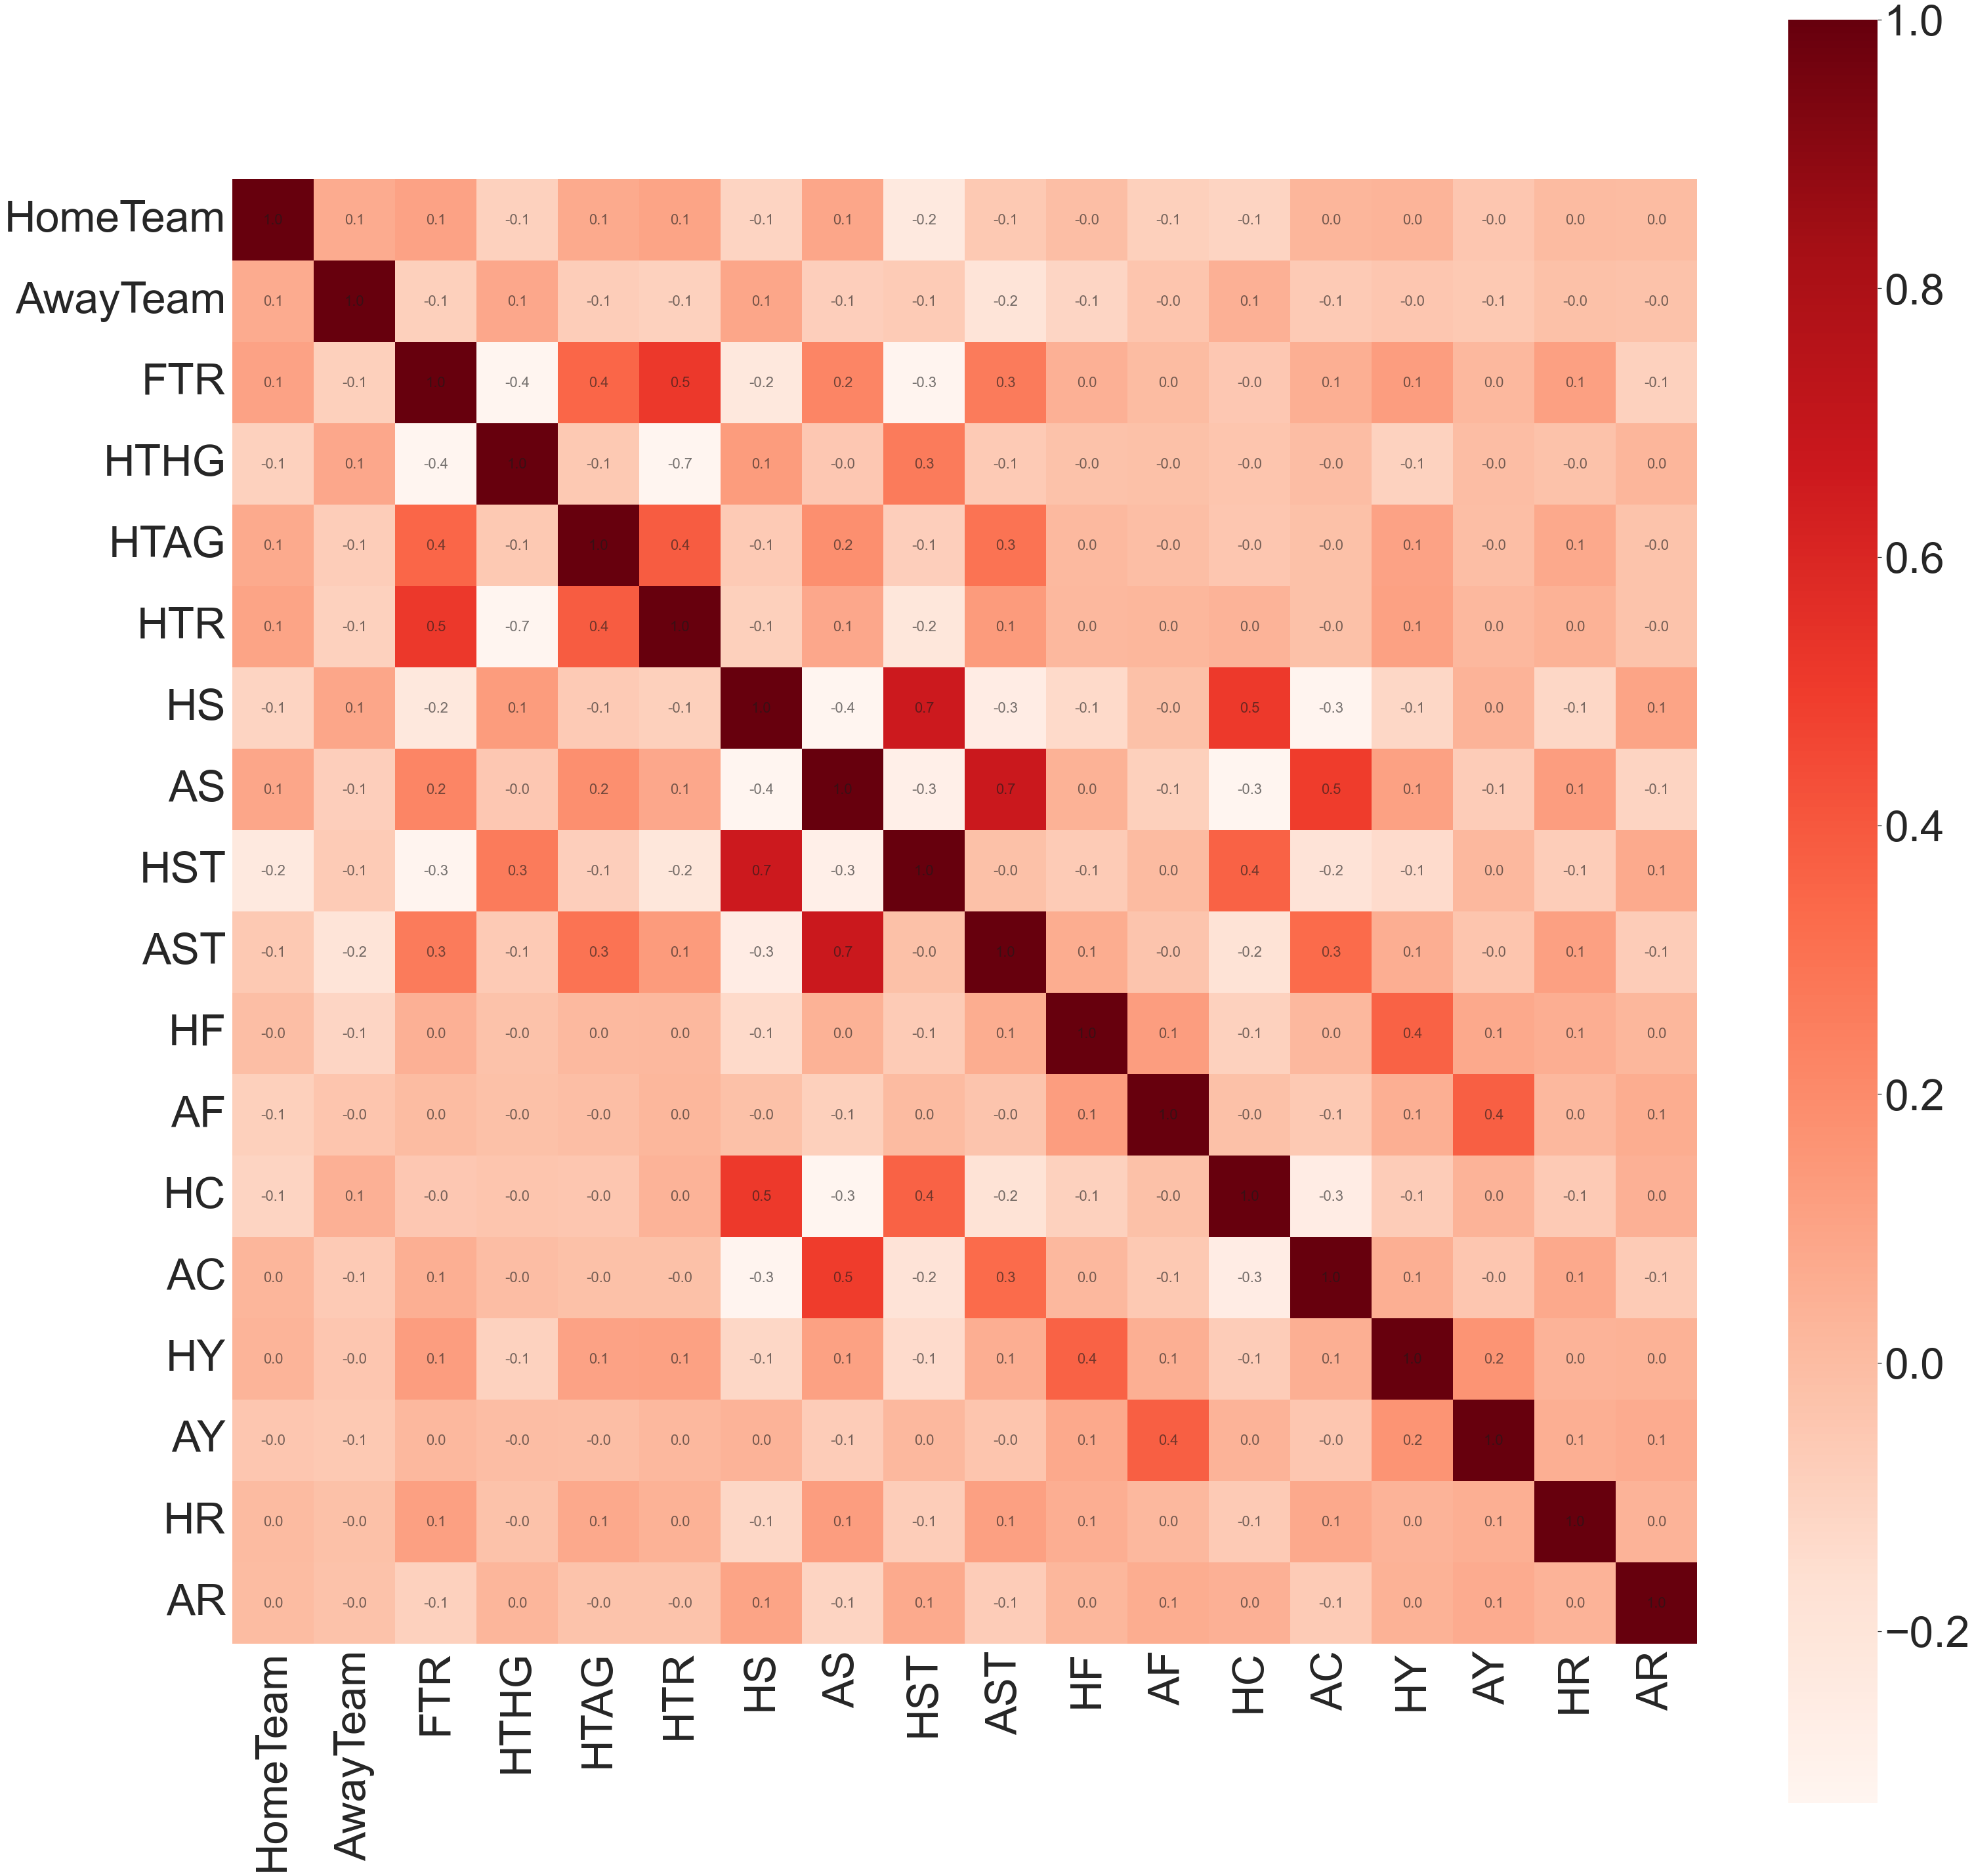

In [19]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(50,50))
annot_kws={'fontsize':22, 
           'fontstyle':'normal',  
           'color':"k",
           'alpha':0.6}
sns.set(font_scale=6)
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, cmap='Reds', robust=True, annot_kws= annot_kws)

## Modeling the Data

In [20]:
#Import for ML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [21]:
# Split our preprocessed data into our features and target arrays
y = data["FTR"].values
X = data.drop("FTR",axis= 1)

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y )

In [22]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((1425, 17), (1425,))

## Decision Tree

In [23]:
# Create a StandardScaler instance
scaler = StandardScaler()


# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Creating the decision tree classifier instance
DTC = tree.DecisionTreeClassifier(random_state=0)

# Fitting the model
DTB = DTC.fit(X_train_scaled, y_train)

In [25]:
# Making predictions using the testing data
dtc_predictions = DTB.predict(X_test_scaled)

dtc_results = pd.DataFrame({
    "Prediction": dtc_predictions, 
    "Actual": y_test
}).reset_index(drop=True)
dtc_results

,Prediction,Actual
0,1,1
1,0,0
2,1,0
3,0,1
4,1,1
...,...,...
1420,0,0
1421,1,1
1422,0,0
1423,1,0


In [26]:
# Calculating the confusion matrix
dt_cm = confusion_matrix(y_test, dtc_predictions)
dt_cm_df = pd.DataFrame(
    dt_cm, index=["Away", 'Home'], columns=["Predicted Away", 'Predicted Home']
)

# Calculating the accuracy score
dt_acc_score = accuracy_score(y_test, dtc_predictions)

In [27]:
# Displaying results
print("Confusion Matrix")
display(dt_cm_df)
print(f"Accuracy Score : {dt_acc_score}")
print("Classification Report")
print(classification_report(y_test, dtc_predictions))

Confusion Matrix


,Predicted Away,Predicted Home
Away,460,189
Home,197,579


Accuracy Score : 0.7291228070175438
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       649
           1       0.75      0.75      0.75       776

    accuracy                           0.73      1425
   macro avg       0.73      0.73      0.73      1425
weighted avg       0.73      0.73      0.73      1425



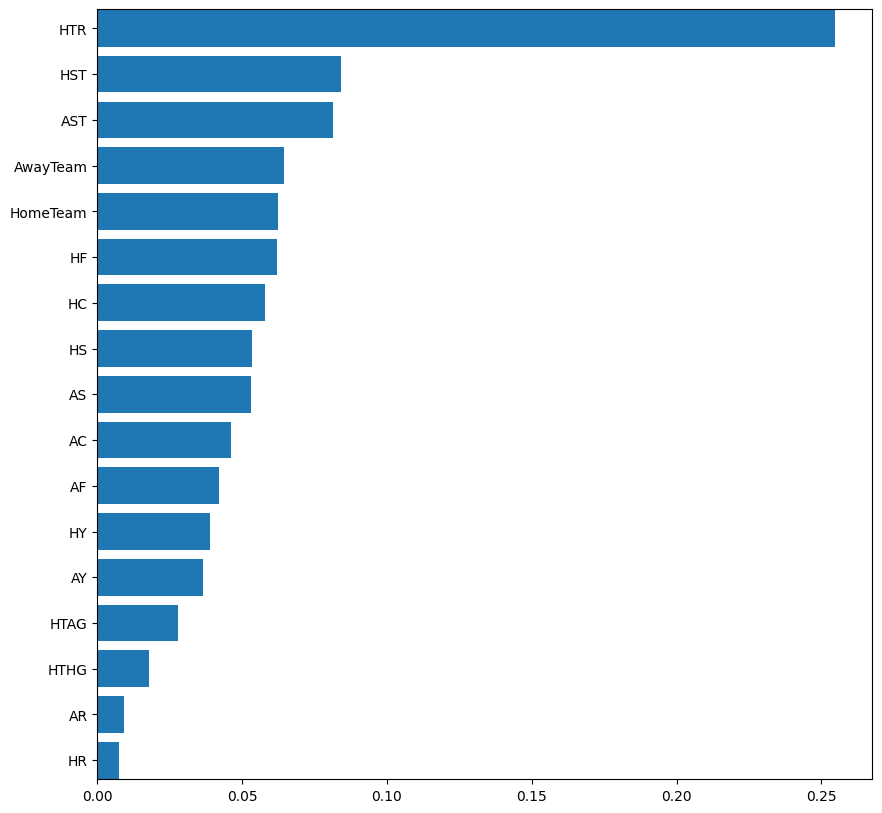

In [46]:
dtc_feature_importances = DTC.feature_importances_
dtc_features = sorted(zip(X.columns, DTC.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in dtc_features]
width = [f[1] for f in dtc_features]
plt.rcdefaults()
fig1, ax1 = plt.subplots()

fig1.set_size_inches(10,10)
plt.margins(y=0.001)

ax1.barh(y=cols, width=width)
plt.rc('axes', labelsize=8)
plt.show()

## SVM Model

In [29]:
# Instantiate a linear SVM model
SVM = SVC(kernel='sigmoid')

# Fit the data
SVM.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [30]:
# Make predictions using the test data
y_pred = SVM.predict(X_test)
svm_results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
svm_results


,Prediction,Actual
0,1,1
1,0,0
2,1,0
3,1,1
4,1,1
...,...,...
1420,1,0
1421,1,1
1422,0,0
1423,1,0


In [31]:
# Calculating the confusion matrix.
svmcm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
svmcm_df = pd.DataFrame(
    svmcm, index=["1", "2"], columns=["Predicted 1", "Predicted 2"])


In [32]:
# Calculating the accuracy score.
svm_acc_score = accuracy_score(y_test, y_pred)

# Displaying results
print("Confusion Matrix")
display(svmcm_df)
print(f"Accuracy Score : {svm_acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 1,Predicted 2
1,315,334
2,300,476


Accuracy Score : 0.5550877192982456
Classification Report
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       649
           1       0.59      0.61      0.60       776

    accuracy                           0.56      1425
   macro avg       0.55      0.55      0.55      1425
weighted avg       0.55      0.56      0.55      1425



## Random Forest Classifier

In [33]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=200, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.811


In [34]:
# Making predictions using the testing data.
rf_predictions = rf_model.predict(X_test_scaled)
rf_predictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
# Calculating the confusion matrix.
rfcm = confusion_matrix(y_test, rf_predictions)

# Create a DataFrame from the confusion matrix.
rfcm_df = pd.DataFrame(
    rfcm, index=["1", "2"], columns=["Predicted 1", "Predicted 2"])


In [36]:
# Calculating the accuracy score.
rf_acc_score = accuracy_score(y_test, rf_predictions)

# Displaying results
print("Confusion Matrix")
display(rfcm_df)
print(f"Accuracy Score : {rf_acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

Confusion Matrix


,Predicted 1,Predicted 2
1,504,145
2,125,651


Accuracy Score : 0.8105263157894737
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       649
           1       0.82      0.84      0.83       776

    accuracy                           0.81      1425
   macro avg       0.81      0.81      0.81      1425
weighted avg       0.81      0.81      0.81      1425



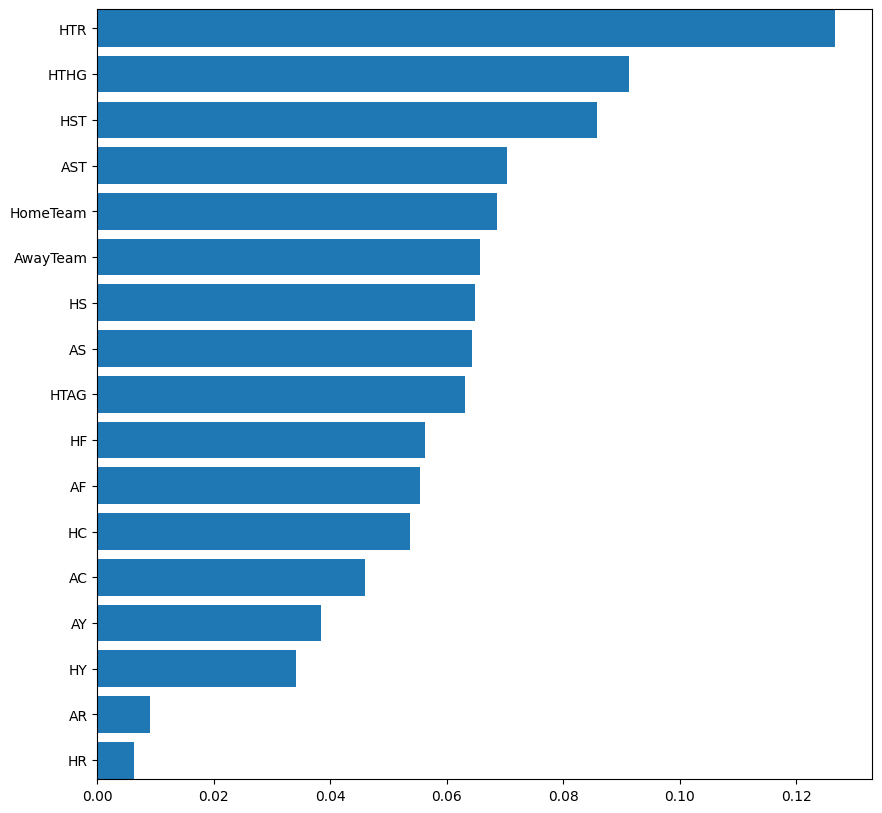

In [45]:
feature_importances = rf_model.feature_importances_
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
plt.rcdefaults()
fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)
plt.rc('axes', labelsize=8)
plt.show()

In [38]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1267522738941881, 'HTR'),
 (0.09133552073259361, 'HTHG'),
 (0.08572305460851487, 'HST'),
 (0.07028384373385407, 'AST'),
 (0.06860519512894628, 'HomeTeam'),
 (0.0657683886018316, 'AwayTeam'),
 (0.0648924931035739, 'HS'),
 (0.06440836333184602, 'AS'),
 (0.06306648643145413, 'HTAG'),
 (0.05619595586350729, 'HF'),
 (0.055426766535133495, 'AF'),
 (0.053616356892433804, 'HC'),
 (0.04602243742211767, 'AC'),
 (0.038351145739433684, 'AY'),
 (0.03416598011430988, 'HY'),
 (0.009058455002371742, 'AR'),
 (0.006327282863889866, 'HR')]

## XGBClassifier

In [39]:
# Create a XGB Classifier.
xg_model = XGBClassifier()

# Fitting the model
xg_model = xg_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = xg_model.predict(X_test_scaled)
print(f" XGB Classifier predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 XGB Classifier predictive accuracy: 0.811


In [40]:
# Making predictions using the testing data.
xg_predictions = xg_model.predict(X_test_scaled)
xg_predictions

array([1, 1, 1, ..., 0, 0, 0])

In [41]:
# Calculating the confusion matrix.
xgcm = confusion_matrix(y_test, xg_predictions)

# Create a DataFrame from the confusion matrix.
xgcm_df = pd.DataFrame(
    xgcm, index=["1", "2"], columns=["Predicted 1", "Predicted 2"])


In [42]:
# Calculating the accuracy score.
xg_acc_score = accuracy_score(y_test, xg_predictions)

# Displaying results
print("Confusion Matrix")
display(xgcm_df)
print(f"Accuracy Score : {xg_acc_score}")
print("Classification Report")
print(classification_report(y_test, xg_predictions))

Confusion Matrix


,Predicted 1,Predicted 2
1,510,139
2,131,645


Accuracy Score : 0.8105263157894737
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       649
           1       0.82      0.83      0.83       776

    accuracy                           0.81      1425
   macro avg       0.81      0.81      0.81      1425
weighted avg       0.81      0.81      0.81      1425



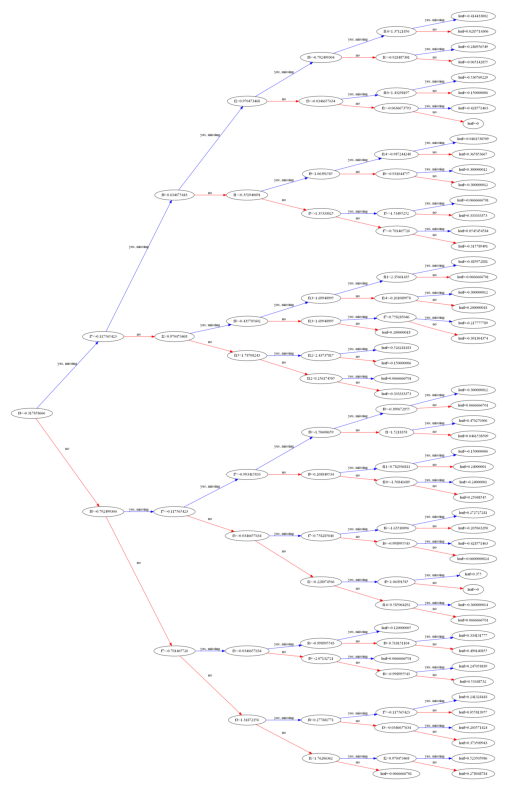

In [47]:
from xgboost import plot_tree
plot_tree(xg_model, rankdir= 'LR')
plt.rcdefaults()
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show(fig)

#### Dependencies Versions
matplotlib==3.5.2

matplotlib-inline==0.1.3

numpy

pandas==1.3.5

plotly==5.9.0

psycopg2==2.9.3

scikit-learn==0.23.0

seaborn==0.11.2

SQLAlchemy==1.4.39

xgboost==1.6.1





